In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

%matplotlib inline

In [5]:
# load the data
dataset_directory="1. Dataset"
dataset_name="recipes.csv"
labels_name="Cuisines.csv"

dataset = pd.read_csv(f"../{dataset_directory}/{dataset_name}")
labels = pd.read_csv(f"../{dataset_directory}/{labels_name}", names = ['class'])

In [6]:
# create label dictionary
labels_dict = labels.to_dict()["class"]
labels_dict

{1: 'Chinese',
 2: 'English',
 3: 'French',
 4: 'German',
 5: 'Greek',
 6: 'Indian',
 7: 'Italian',
 8: 'Japanese',
 9: 'Mexican',
 10: 'Moroccan',
 11: 'Spanish',
 12: 'Thai'}

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Columns: 710 entries, 'acorn squash' to cuisine
dtypes: int64(710)
memory usage: 22.9 MB


In [8]:
dataset.head()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# inspect random samples
dataset.sample(7, random_state=42)

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
3188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3264,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
1967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
393,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [10]:
dataset.describe()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
count,4236.000000,4236.00000,4236.000000,4236.00000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,...,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.00000
mean,0.000708,0.00118,0.000944,0.00118,0.000236,0.000708,0.000944,0.013220,0.019594,0.000236,...,0.004721,0.000708,0.000236,0.000708,0.002361,0.035175,0.000472,0.003541,0.029037,5.50000
std,0.026606,0.03434,0.030718,0.03434,0.015365,0.026606,0.030718,0.114229,0.138617,0.015365,...,0.068558,0.026606,0.015365,0.026606,0.048536,0.184243,0.021726,0.059409,0.167930,3.45246
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.75000
50%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.50000
75%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.25000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.00000


### Drop duplicates

In [11]:
# check for duplicated recipes 
dataset[dataset.duplicated()]

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [12]:
dataset.drop_duplicates(inplace = True)

In [13]:
dataset['cuisine'].describe()

count    4220.000000
mean        5.498815
std         3.452210
min         0.000000
25%         2.750000
50%         5.000000
75%         8.000000
max        11.000000
Name: cuisine, dtype: float64

In [14]:
# check for missing values
print("Missing values: " + str(dataset.isna().values.any()))

Missing values: False


In [15]:
# remove quotes from column names
dataset.columns = dataset.columns.str.replace("'", '')

In [16]:
# check if the dataset is balanced
dataset['cuisine'].value_counts()

5     353
0     352
1     352
4     352
6     352
7     352
8     352
10    352
11    352
2     351
3     351
9     349
Name: cuisine, dtype: int64

In [17]:
X = dataset.drop('cuisine', 1)

<ipython-input-17-107b8c78447f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('cuisine', 1)


In [18]:
# acorn squash to zucchini
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4235
Columns: 709 entries, acorn squash to zucchini
dtypes: int64(709)
memory usage: 22.9 MB


In [19]:
y = dataset[['cuisine']]

In [89]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 4235
Data columns (total 1 columns):
cuisine    4220 non-null int64
dtypes: int64(1)
memory usage: 225.9 KB


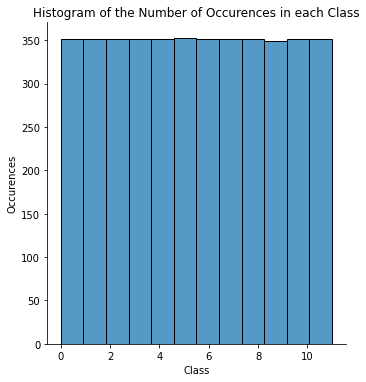

In [20]:
# plot the number of occurences of each class
y_array = y.values.flatten()
sns.displot(y_array, bins=12)
plt.xlabel('Class')
plt.ylabel('Occurences')
plt.title('Histogram of the Number of Occurences in each Class')
plt.show()

#### => the dataset is balanced

### Cross-validation and Hold-out approach.

In [21]:
# stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, 
    random_state=42,
    stratify=y)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827 entries, 1944 to 3292
Columns: 709 entries, acorn squash to zucchini
dtypes: int64(709)
memory usage: 15.3 MB


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 242 to 1442
Columns: 709 entries, acorn squash to zucchini
dtypes: int64(709)
memory usage: 7.5 MB


In [24]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827 entries, 1944 to 3292
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cuisine  2827 non-null   int64
dtypes: int64(1)
memory usage: 44.2 KB


In [25]:
# check the results of the stratified split
y_train.value_counts()

cuisine
0          236
1          236
4          236
5          236
6          236
7          236
8          236
10         236
11         236
2          235
3          235
9          233
dtype: int64

In [26]:
y_test.value_counts()

cuisine
5          117
0          116
1          116
2          116
3          116
4          116
6          116
7          116
8          116
9          116
10         116
11         116
dtype: int64

### Most frequent ingredients for each cuisine and boxplot for number of ingredients 

In [27]:
# finding top ingredients in each cuisine
cuisines = dataset.groupby('cuisine').mean()
n = 4

# function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    c = row.name + 1
    print(labels_dict[c])
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:n]
    row_sorted = list(row_sorted)[0:n]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")
    
    return top_ingredients, row_sorted

create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

Chinese
soy sauce (84%) garlic (62%) ginger (55%) cornstarch (47%) 

English
onion (55%) butter (36%) potato (34%) garlic (33%) 

French
garlic (53%) butter (49%) wine (48%) onion (42%) 

German
onion (65%) pepper (40%) salt (38%) flour (31%) 

Greek
olive oil (68%) garlic (67%) onion (58%) oregano (50%) 

Indian
onion (72%) garlic (71%) ginger (62%) cumin (55%) 

Italian
garlic (64%) olive oil (47%) parmesan cheese (47%) onion (43%) 

Japanese
soy sauce (70%) rice wine (39%) sugar (37%) ginger (36%) 

Mexican
onion (54%) tortilla (49%) garlic (44%) cumin (42%) 

Moroccan
onion (75%) garlic (66%) olive oil (65%) cumin (63%) 

Spanish
garlic (80%) olive oil (73%) onion (66%) tomato (43%) 

Thai
garlic (66%) fish sauce (50%) chicken (48%) coconut milk or cream (40%) 



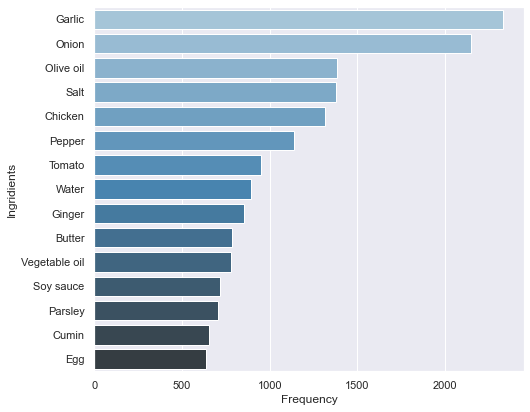

In [28]:
freq_ingredients = pd.DataFrame(X.sum(axis=0).sort_values(ascending = False), columns = ['freq']).reset_index()
top_freq_ingredients = freq_ingredients.head(15)

sns.set(rc={'figure.figsize':(7.7,6.7)})

y_new = [ingr.capitalize() for ingr in top_freq_ingredients['index']]

ax = sns.barplot(x = 'freq', y = y_new, data=top_freq_ingredients, palette="Blues_d")
ax.set(xlabel='Frequency', ylabel='Ingridients')

plt.savefig("ingridientsFrequency.png", bbox_inches = 'tight', pad_inches = 0)

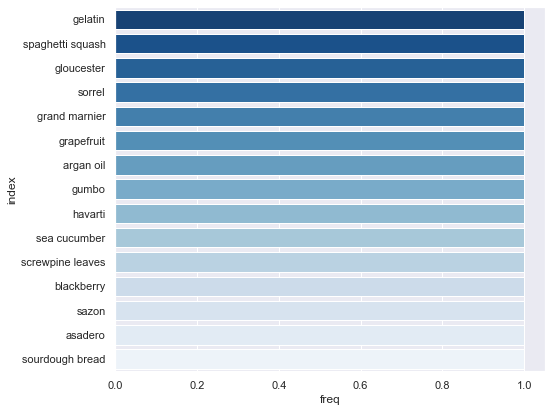

In [29]:
least_freq_ingredients = freq_ingredients.tail(15)
ax = sns.barplot(x = 'freq', y = 'index', data=least_freq_ingredients, palette="Blues_r")

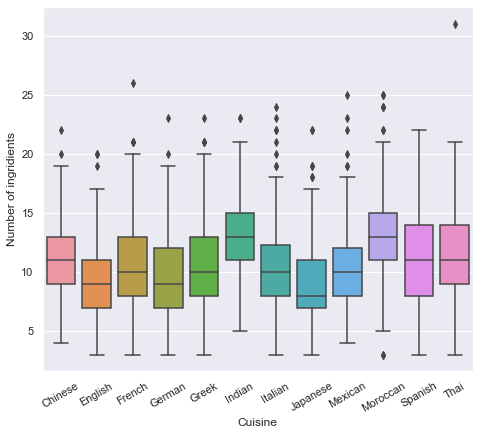

In [31]:
num_ingredients = pd.DataFrame(X.sum(axis=1), columns=['num_ing'])
num_ingredients['cuisines'] = y+1
num_ingredients['cuisines_name'] = num_ingredients['cuisines'].apply(lambda x: labels_dict.get(x))
ax = sns.boxplot(x="cuisines_name", y="num_ing", data=num_ingredients)
ax.set_xticklabels(labels = labels_dict.values(), rotation = 30)

ax.set(xlabel='Cuisine', ylabel='Number of ingridients')

plt.savefig("boxplot_ingridinents_number.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

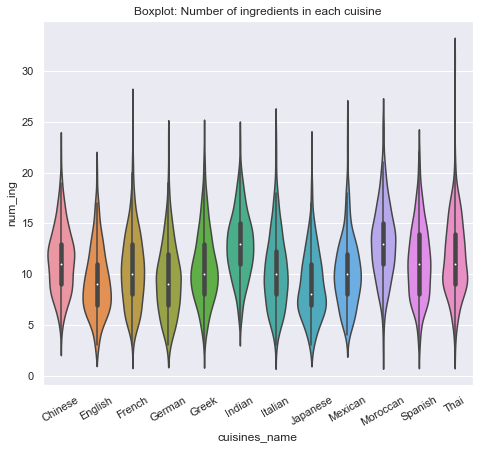

In [32]:
ax = sns.violinplot(x="cuisines_name", y="num_ing", data=num_ingredients)
ax.set_xticklabels(labels = labels_dict.values(), rotation = 30)
ax.set_title('Boxplot: Number of ingredients in each cuisine')
plt.show()

In [35]:
train = pd.concat([X_train, y_train], axis=1)
train.to_csv(f"../{dataset_directory}/train_split.csv")
test = pd.concat([X_test, y_test], axis=1)
train.to_csv(f"../{dataset_directory}/test_split.csv")

### For further analysis, either X_train and y_train shoud be used, or train (concatenates  X_train and y_train in a single frame). The concatanated train dataset is also saved as "train_split.csv" and should be used if possible in new notebooks in order to avoid merge conflicts.

In [36]:
# mean of rows
X_train_mean = X_train.mean(axis=0)
X_train_mean

acorn squash                     0.000707
adobo                            0.001769
african birdseye chile pepper    0.001061
ale                              0.001061
aleppo pepper                    0.000000
                                   ...   
yellow squash                    0.002122
yogurt                           0.035373
zaatar                           0.000354
zest                             0.003891
zucchini                         0.030067
Length: 709, dtype: float64

In [37]:
# median of all rows
X_train_median = X_train.median(axis=0)
X_train_median

acorn squash                     0.0
adobo                            0.0
african birdseye chile pepper    0.0
ale                              0.0
aleppo pepper                    0.0
                                ... 
yellow squash                    0.0
yogurt                           0.0
zaatar                           0.0
zest                             0.0
zucchini                         0.0
Length: 709, dtype: float64

 #### Notice the difference between the values above

In [38]:
dist = np.linalg.norm(X_train_mean-X_train_median)
print("Distance between mean and median: "+str(dist))

Distance between mean and median: 1.2314311311972468


#### This is a rather large value which can reflect the presence of outliers. However, I think it is caused by the nature of median when working with categorical values. Sorting the values and choosing the one in the middle will result in extreme values (i.e., 0 or 1). In contrast, the average will have rather balanced values (e.g., 0.5)

In [39]:
# min, max, and average number of ingredients
num_ingridients = X_train.sum(axis=1)
print("minimum number of ingredients for a recipe: {}".format(num_ingridients.min()))
print("maximum number of ingredients for a recipe: {}".format(num_ingridients.max()))
print("average number of ingredients for a recipe: {:.0f}".format(num_ingridients.mean()))

minimum number of ingredients for a recipe: 3
maximum number of ingredients for a recipe: 26
average number of ingredients for a recipe: 11


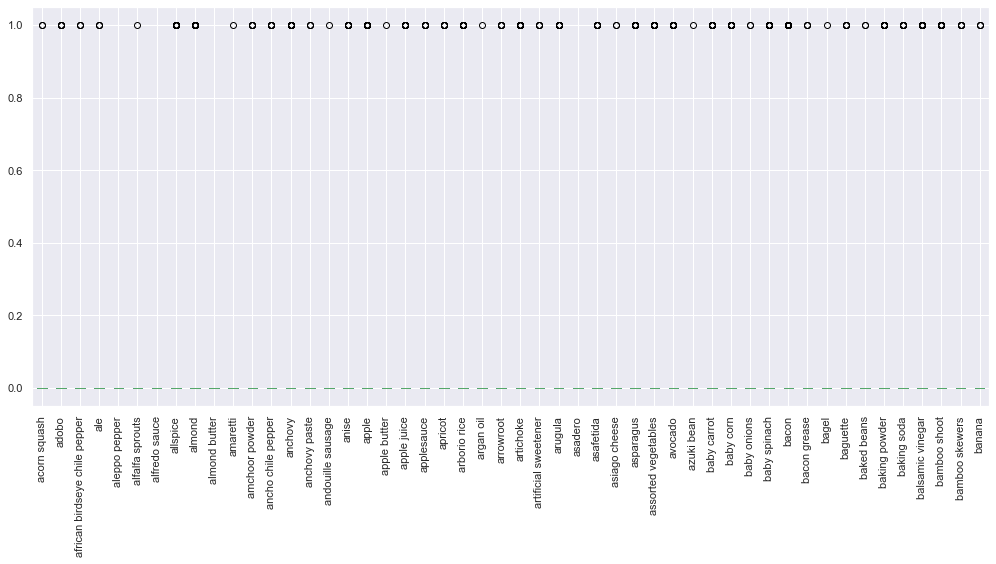

In [40]:
X_train.iloc[:,0:50].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()

#### Box/violin plots are not insightful in our case

<AxesSubplot:>

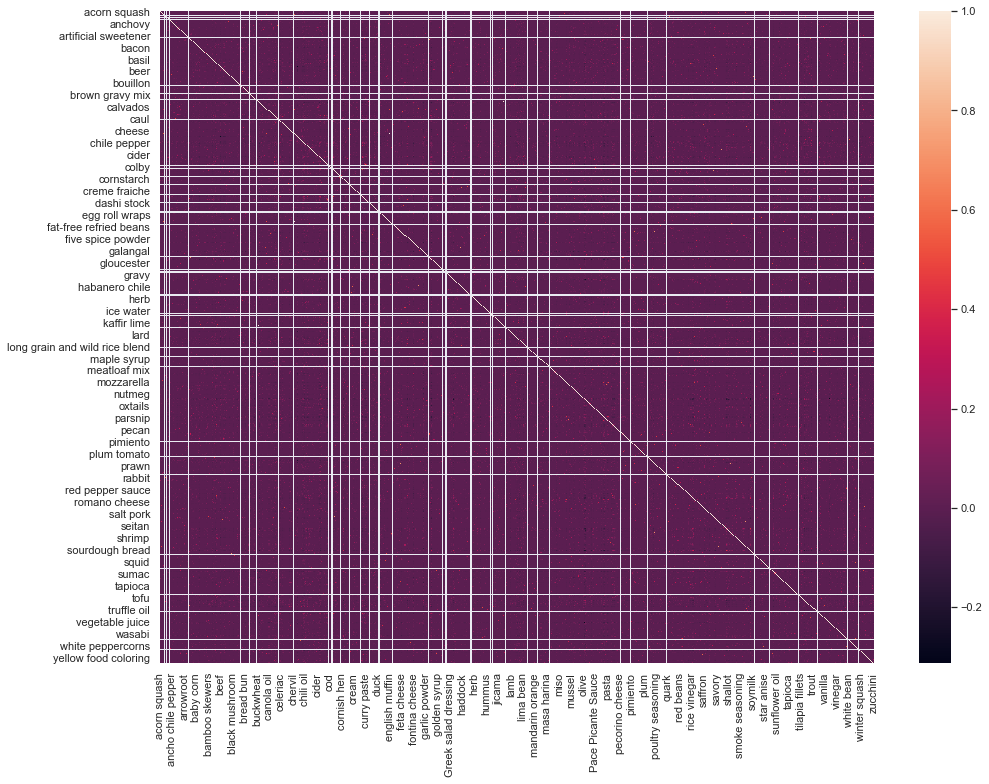

In [42]:
corr_matrix = X_train.corr()
figure = plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False)

In [43]:
X_train.columns

Index(['acorn squash', 'adobo', 'african birdseye chile pepper', 'ale',
       'aleppo pepper', 'alfalfa sprouts', 'alfredo sauce', 'allspice',
       'almond', 'almond butter',
       ...
       'yams', 'yeast', 'yellow curry paste', 'yellow food coloring',
       'yellow split pea', 'yellow squash', 'yogurt', 'zaatar', 'zest',
       'zucchini'],
      dtype='object', length=709)

<ipython-input-45-f28884206fd6>:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  temp_data = X_train[X_train.columns & temp_ingr]


(10.1, -0.1)

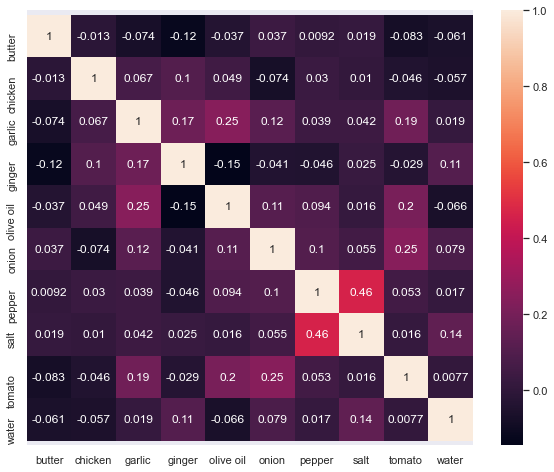

In [45]:
temp_ingr = freq_ingredients.head(10)['index']
temp_data = X_train[X_train.columns & temp_ingr]

corr_matrix = temp_data.corr()
figure = plt.figure(figsize=(10,8))
ax =sns.heatmap(corr_matrix, annot=True)
ax.set_ylim(len(corr_matrix)+0.1, -0.1)

In [46]:
num_ingredients

,num_ing,cuisines,cuisines_name
0,15,1,Chinese
1,12,1,Chinese
2,8,1,Chinese
3,14,1,Chinese
4,14,1,Chinese
...,...,...,...
4231,12,12,Thai
4232,14,12,Thai
4233,11,12,Thai
4234,6,12,Thai


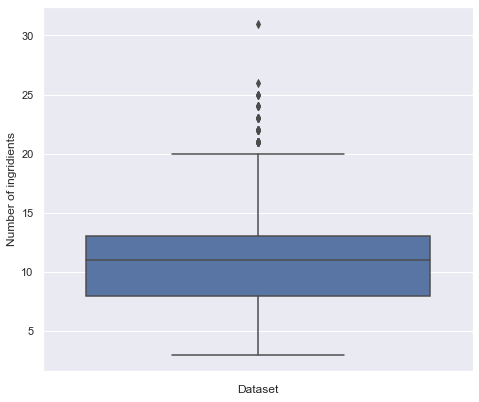

<Figure size 720x288 with 0 Axes>

In [47]:
ax = sns.boxplot(y="num_ing", data=num_ingredients)
figure = plt.figure(figsize=(10,4))
ax.set(xlabel='Dataset', ylabel='Number of ingridients')

plt.savefig("boxplot_ingridinents_number.png", bbox_inches = 'tight',
    pad_inches = 0)